In [147]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [148]:
veh = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/vehicles_train.csv')
veh.head()

,price,year,miles,doors,vtype
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car


<h3> Creating a simple mean model and measuring its RMSE </h3>

In [149]:
veh['predicted'] = veh.price.mean()

In [150]:
veh.head()

,price,year,miles,doors,vtype,predicted
0,22000,2012,13000,2,car,6571.428571
1,14000,2010,30000,2,car,6571.428571
2,13000,2010,73500,4,car,6571.428571
3,9500,2009,78000,4,car,6571.428571
4,9000,2007,47000,4,car,6571.428571


In [151]:
print('RMSE with the simeple mean model is ',np.sqrt(mean_squared_error(veh.price,veh.predicted)))

RMSE with the simeple mean model is  5936.981985995983


In [152]:
def split_miles(miles):
    low_mileage_price = veh[veh['miles'] < miles]['price'].mean()
    high_mileage_price = veh[veh['miles'] >= miles]['price'].mean()
    print('low_mileage_price ',low_mileage_price)
    print('high_mileage_price ',high_mileage_price)
    veh['predicted'] = np.where(veh['miles'] < miles,low_mileage_price,high_mileage_price)
    return np.sqrt(mean_squared_error(veh['price'],veh['predicted']))

In [153]:
RMSE = split_miles(50000)
print('RMSE ',RMSE)

low_mileage_price  15000.0
high_mileage_price  4272.727272727273
RMSE  3984.0917425414564


In [154]:
miles_range = range(veh['miles'].min(),veh['miles'].max(),1000)
RMSE  = list()
for i in miles_range:
    RMSE.append(split_miles(i))

low_mileage_price  nan
high_mileage_price  6571.428571428572
low_mileage_price  22000.0
high_mileage_price  5384.615384615385
low_mileage_price  22000.0
high_mileage_price  5384.615384615385
low_mileage_price  22000.0
high_mileage_price  5384.615384615385
low_mileage_price  22000.0
high_mileage_price  5384.615384615385
low_mileage_price  22000.0
high_mileage_price  5384.615384615385
low_mileage_price  22000.0
high_mileage_price  5384.615384615385
low_mileage_price  22000.0
high_mileage_price  5384.615384615385
low_mileage_price  22000.0
high_mileage_price  5384.615384615385
low_mileage_price  22000.0
high_mileage_price  5384.615384615385
low_mileage_price  22000.0
high_mileage_price  5384.615384615385
low_mileage_price  22000.0
high_mileage_price  5384.615384615385
low_mileage_price  22000.0
high_mileage_price  5384.615384615385
low_mileage_price  22000.0
high_mileage_price  5384.615384615385
low_mileage_price  22000.0
high_mileage_price  5384.615384615385
low_mileage_price  22000.0
hi

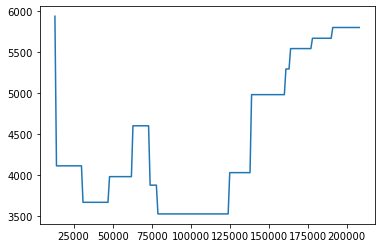

In [155]:
plt.plot(miles_range,RMSE)
plt.show()

In [156]:
veh['vtype'] = veh.vtype.map({'car':0, 'truck':1})

In [157]:
features = [ 'year', 'miles', 'doors', 'vtype']
X = veh[features]
y = veh['price']

In [158]:
max_depth = range(1,10)
RMSE_CV = list()
for i in max_depth:
    treereg = DecisionTreeRegressor(max_depth=i,random_state=1)
    np.set_printoptions(suppress=True)
    scores = (-cross_val_score(treereg,X,y,cv=14,scoring='neg_mean_squared_error'))
    
    RMSE_CV.append((np.mean(scores)))


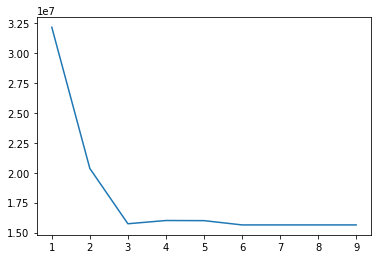

In [159]:
plt.plot(max_depth,RMSE_CV)
plt.show()

In [160]:
treeReg = DecisionTreeRegressor(max_depth=3)
treeReg.fit(X,y)


DecisionTreeRegressor(max_depth=3)

In [161]:
from sklearn.tree import export_graphviz
export_graphviz(treeReg, out_file='tree_vehicles.dot', feature_names=features)


Run  "dot -Tpng tree_vehicles.dot -o tree_vehicles.png" cmd in the anaconda prompt under the directory in which the .dot file is present

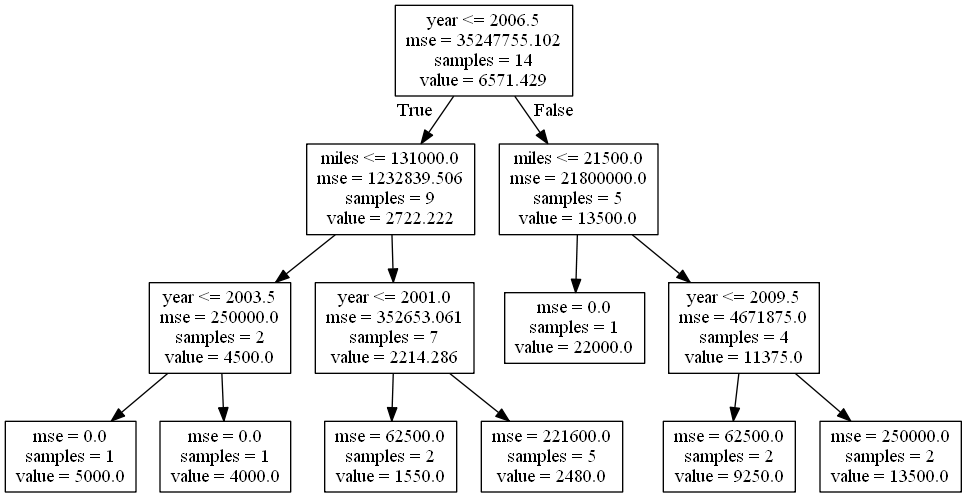

In [186]:
Image(filename='C://Users//User//Documents//Library_Practise//tree_vehicles.png')

In [162]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/vehicles_test.csv'
test = pd.read_csv(url)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [163]:
X_test = test[features]
y_test = test.price
y_pred = treeReg.predict(X_test)
y_pred

array([ 5000.,  4000., 13500.])

In [164]:
print('RMSE on the test data is ',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE on the test data is  1848.422751068236


In [165]:
veh.head()

,price,year,miles,doors,vtype,predicted
0,22000,2012,13000,2,0,6923.076923
1,14000,2010,30000,2,0,6923.076923
2,13000,2010,73500,4,0,6923.076923
3,9500,2009,78000,4,0,6923.076923
4,9000,2007,47000,4,0,6923.076923


<h2> DecisionTree Classifier </h2>

In [166]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'
titanic = pd.read_csv(url)

In [167]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [168]:
titanic.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [169]:
titanic.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [170]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [171]:
impute = SimpleImputer(missing_values=np.nan,strategy='mean')
impute.fit(np.array(titanic.loc[:,'Age']).reshape(-1,1))
titanic.loc[:,'Age'] = impute.transform(np.array(titanic.loc[:,'Age']).reshape(-1,1))
print('After removal of NA values  from Age : ',titanic.Age.isnull().sum())

impute = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
impute.fit(np.array(titanic.loc[:,'Embarked']).reshape(-1,1))
titanic.loc[:,'Embarked'] = impute.transform(np.array(titanic.loc[:,'Embarked']).reshape(-1,1))
print('After removal of NA values  from Embarked : ',titanic.Embarked.isnull().sum())

titanic['Sex'] = titanic['Sex'].map({'male':1,'female':0})
titanic['Embarked'] = titanic['Embarked'].map({'S':0,'C':1,'Q':2})

After removal of NA values  from Age :  0
After removal of NA values  from Embarked :  0


In [172]:
features = ['Pclass','Sex','Age','Embarked']
X = titanic[features]
y = titanic['Survived']

In [173]:
X

,Pclass,Sex,Age,Embarked
0,3,1,22.000000,0
1,1,0,38.000000,1
2,3,0,26.000000,0
3,1,0,35.000000,0
4,3,1,35.000000,0
...,...,...,...,...
886,2,1,27.000000,0
887,1,0,19.000000,0
888,3,0,29.699118,0
889,1,1,26.000000,1


In [174]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [175]:
max_depth = list(range(1,11))
accuracy = []
for i in (max_depth):
    DTclf = DecisionTreeClassifier(max_depth=i)
    score = cross_val_score(DTclf,X,y,cv=10,scoring='accuracy')
    accuracy.append(np.mean(score))

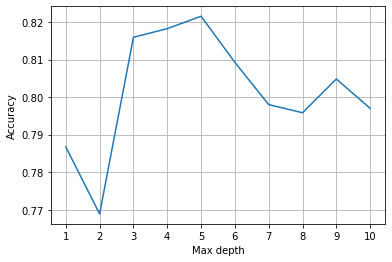

In [176]:
plt.plot(max_depth,accuracy)
x_numbers = np.linspace(1,10,10)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.xticks(x_numbers)
plt.grid()
plt.show()

In [177]:
DTclf = DecisionTreeClassifier(max_depth=5)
DTclf.fit(X,y)
export_graphviz(DTclf,out_file='titanic.dot',feature_names=features)

In [178]:
print('Important features are ')
feat_impt = dict(zip(features,DTclf.feature_importances_))

Important features are 


In [179]:
pd.DataFrame({'features':features,'Impotances ':DTclf.feature_importances_})

,features,Impotances
0,Pclass,0.226873
1,Sex,0.584326
2,Age,0.151567
3,Embarked,0.037234


In [180]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

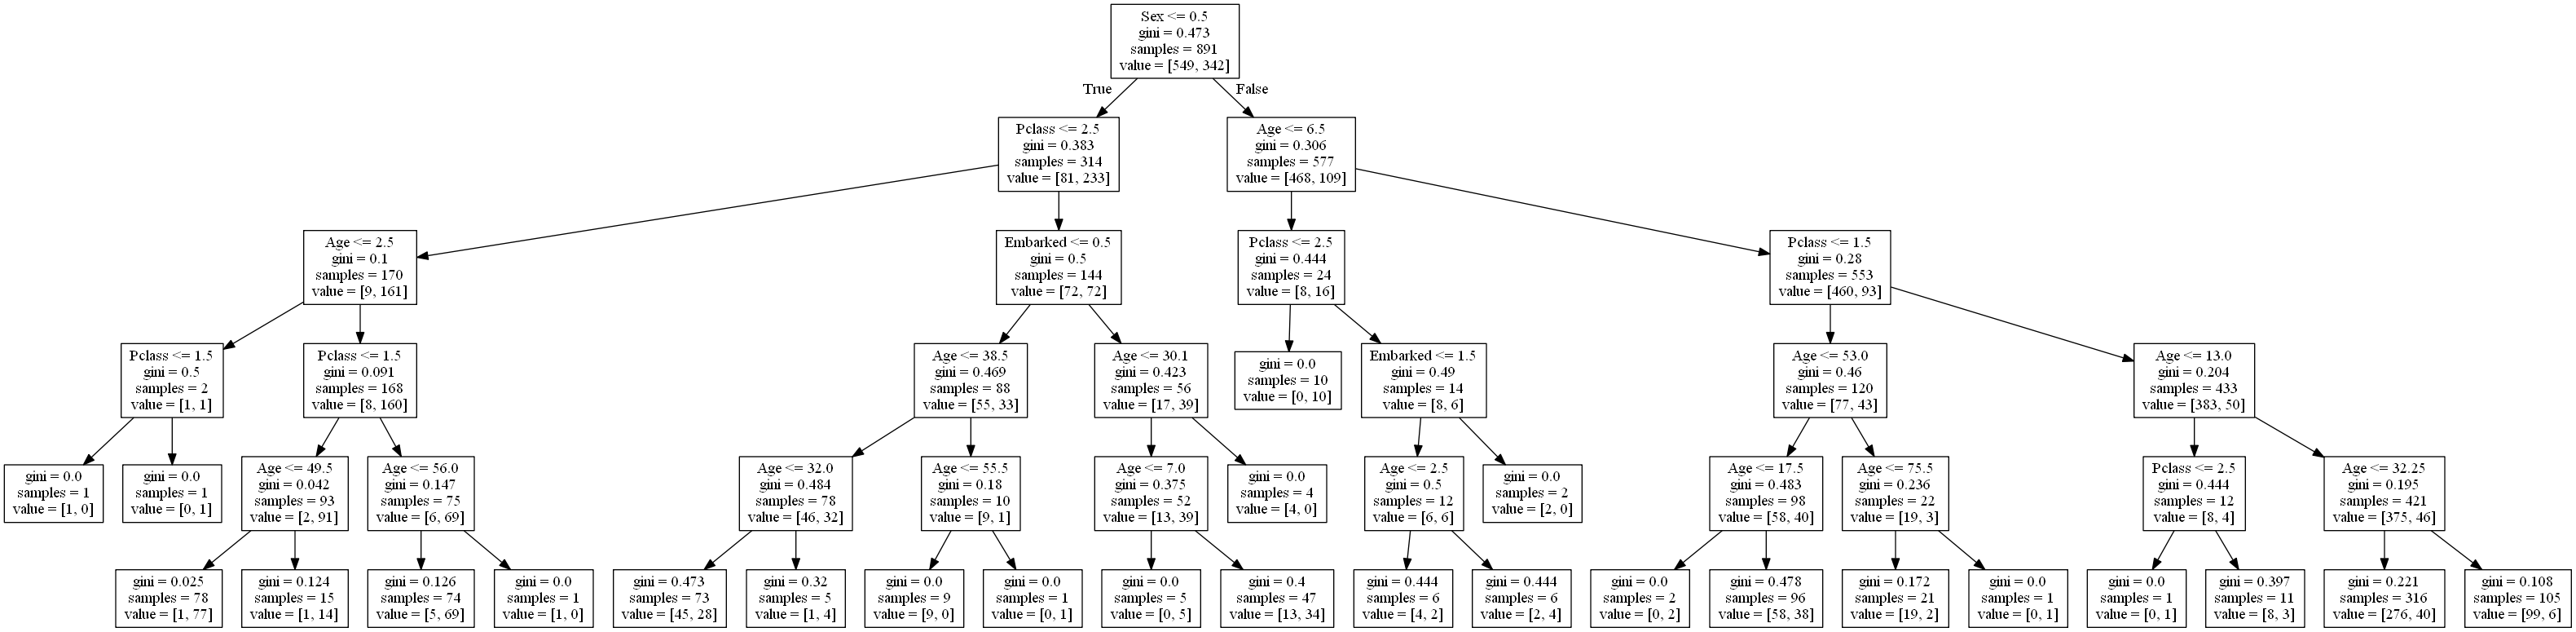

In [183]:
from IPython.display import Image
Image(filename='C://Users//User//Documents//Library_Practise//titanic.png')